# Introduction
The client, Naomi, currently uses a combination of solar power and electricity purchased from her electricity provide her to meet all her electricity needs. Solar power meets Naomi’s electricity usage at the time it is generated, and it helps Naomi reduce the amount of electricity required. However, Naomi receives no benefit from the excess energy that is generated, as she has no way of storing it. She is considering obtaining a battery to store the excess power, and she is hoping that it can also offset her current costs of electricity. The Battery costs $7000 and will be installed on January 1, 2022. It is projected to last 20 years, and can store 12.5 kWh, and has a minimum threshold of 0 kWh.

Here are some important points to keep in mind as we progress through this analysis.

1. All electricity usage is measured in kilowatt hours (kWh)
2. The current price of energy from Naomi’s electricity provider is $0.17 per kWh.
3. My task as the data analyst on this project is to help Naomi determine if the cost savings generated from her investment in Solar    Batteries are significant enough to justify her investment.

# The Data
The data provided was from a measuring device Naomi had installed which provided data showing her solar electricity generation and electricity usage for 2020 in hourly increments.

# The Macroeconomic Conditions
From 1 January 2022, Naomi will pay $0.17 for each kWh of electricity purchased from her electricity provider. The electricity price increases with annual electricity price inflation on 1 January 2023, and each 1 January thereafter.

A recent government report estimated electricity price inflation over the next 20 years to be 4% per annum Naomi thinks that the global focus on climate change will cause electricity prices to rise faster than 4% per annum and she estimates that electricity price inflation may increase by an additional 0.25% per annum year on year (i.e. an increase of 4.0% per annum at 1 January 2023, 4.25% per annum at 1 January 2024, 4.50% per annum at 1 January 2025, etc.).

# Purpose
The goal of the analysis is to help the client determine if investing in a Solar Battery will be cost effective, and if it will help her realize any worthwhile cost savings with regards to her electricity expenditure. Our goals are threefold:

To create a model to determine the extra kWh that can be saved by using the solar battery.
To analyze the potential savings in her electricity costs from purchasing the battery.
To calculate the NPV and IRR in the following 2 scenarios to help Naomi determine if this is a worthwhile investment. * Scenario 1. Electricity prices increase as expected by the government, 4% p.a. * Scenario 2. Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a, as estimated by Naomi.

## Import necessay libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns

%pip install numpy-financial
import numpy_financial as npf

### Import data into a dataframe for futher analysis

In [2]:

electricity_data = pd.read_excel('Data/Junior Data Analyst _ Data.xlsx',
                                 engine='openpyxl',sheet_name='Raw Data',skiprows=(2))
electricity_data.head(4)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Unnamed: 4,Unnamed: 5
0,0.0,2020-01-01 00:00:00.000000,0.0,1.509849,NaN,NaN
1,1.0,2020-01-01 01:00:00.000003,0.0,1.411859,NaN,NaN
2,2.0,2020-01-01 01:59:59.999997,0.0,1.023898,NaN,NaN
3,3.0,2020-01-01 03:00:00.000000,0.0,0.642000,NaN,NaN


#### remove unneccesary columns

In [3]:

electricity_data.drop(['Unnamed: 4','Unnamed: 5'],inplace=True,axis=1)
electricity_data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0.0,2020-01-01 00:00:00.000000,0.0,1.509849
1,1.0,2020-01-01 01:00:00.000003,0.0,1.411859
2,2.0,2020-01-01 01:59:59.999997,0.0,1.023898
3,3.0,2020-01-01 03:00:00.000000,0.0,0.642000
4,4.0,2020-01-01 04:00:00.000003,0.0,0.960000


#### summary info about the data

In [4]:

electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   float64       
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 305.1 KB


In [5]:
#check for NaN values in the data column
check_nan = electricity_data.isnull().values.any()
check_nan


True

In [6]:
# drop empty rows
electricity_data.dropna(axis=0,inplace=True)
check_nan = electricity_data.isnull().values.any()
check_nan
electricity_data.tail(5)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
8755,19.0,2020-12-31 19:00:00.000003,0.012,4.395600
8756,20.0,2020-12-31 19:59:59.999997,0.003,4.560600
8757,21.0,2020-12-31 21:00:00.000000,0.000,2.022000
8758,22.0,2020-12-31 22:00:00.000003,0.015,1.668000
8759,23.0,2020-12-31 22:59:59.999997,0.000,0.805919


#### rename columns headers

In [7]:
# rename columns
electricity_data.rename(columns = {'Hour':'hour',
                                 'Date/hour start':'date_hour_start',
                                 'Solar electricity generation (kWh)':'solar_kWh',
                                 'Electricity usage (kWh)':'electric_use_kWh'}, inplace = True)
electricity_data.head()

,hour,date_hour_start,solar_kWh,electric_use_kWh
0,0.0,2020-01-01 00:00:00.000000,0.0,1.509849
1,1.0,2020-01-01 01:00:00.000003,0.0,1.411859
2,2.0,2020-01-01 01:59:59.999997,0.0,1.023898
3,3.0,2020-01-01 03:00:00.000000,0.0,0.642000
4,4.0,2020-01-01 04:00:00.000003,0.0,0.960000


### 1. Explore the data

In [8]:
# describe the data to learn more about the data.
electricity_data.describe()

,hour,solar_kWh,electric_use_kWh
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.312704
std,6.922582,2.026098,491.479806
min,0.000000,0.000000,-12.624000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,46000.000000


<AxesSubplot:xlabel='hour'>

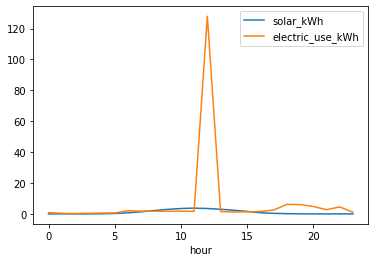

In [9]:
#calculate avrg solar generation and avrg grid electricity usage
solar_vs_grid = electricity_data.groupby('hour').mean()

#plot the table in a line graph
solar_vs_grid.plot(kind='line')

In [10]:
solar_vs_grid.idxmax().to_frame(),solar_vs_grid.max().to_frame()

(                     0
 solar_kWh         11.0
 electric_use_kWh  12.0,
                            0
 solar_kWh           3.751915
 electric_use_kWh  128.000444)

There is a huge spike in electricity usage at 12 noon. check if there are any outliers causing of this spike.

### 2. Investigate the outliers

<AxesSubplot:xlabel='electric_use_kWh'>

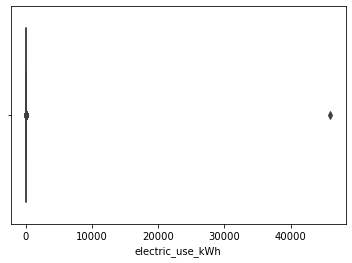

In [11]:

sns.boxplot(x='electric_use_kWh',data=electricity_data)


<AxesSubplot:xlabel='solar_kWh'>

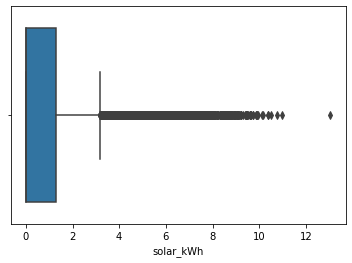

In [12]:
sns.boxplot(x='solar_kWh', data = electricity_data)

Appears to have an Outlier for the electricity data skeewing the mean calculation


### correct the outlier

Repalce the max value with the median

<AxesSubplot:xlabel='electric_use_kWh'>

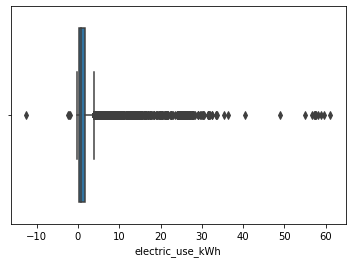

In [13]:
# to correct the data replace the value with the median and visualize the data again.
data = electricity_data
# calculate the median
electric_median = data['electric_use_kWh'].median()

#repalce the etreme value with the median.
data['electric_use_kWh'] = np.where(data['electric_use_kWh']==data['electric_use_kWh'].max(),
                                  electric_median,data['electric_use_kWh'])


# Plot
sns.boxplot(x='electric_use_kWh',data=electricity_data)

In [14]:
data['electric_use_kWh'].mean()

2.061633192100455

<AxesSubplot:xlabel='hour'>

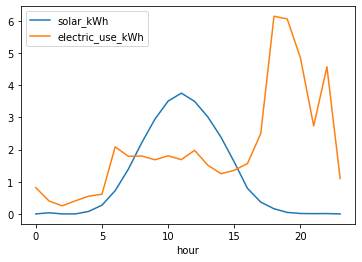

In [15]:
#calculate avrg solar generation and avrg grid electricity usage
solar_vs_grid = electricity_data.groupby('hour').mean()

#plot the table in a line graph
solar_vs_grid.plot(kind='line')

## Create the model
Determine the cummalative battery cahrge level(kWh) per hour for year 2020
We will use the data to determine the cost saving.


### calculate the amount of electricity to be bought and create a new column

In [19]:
# calculate the amount of electricity to be bought and create a new column
data['elec_to_buy_kWh'] = data['electric_use_kWh']-data['solar_kWh']
# the values can not be zero
data.loc[data['elec_to_buy_kWh']<0,'elec_to_buy_kWh'] = 0

data.head(10)

,hour,date_hour_start,solar_kWh,electric_use_kWh,elec_to_buy_kWh
0,0.0,2020-01-01 00:00:00.000000,0.000,1.509849,1.509849
1,1.0,2020-01-01 01:00:00.000003,0.000,1.411859,1.411859
2,2.0,2020-01-01 01:59:59.999997,0.000,1.023898,1.023898
3,3.0,2020-01-01 03:00:00.000000,0.000,0.642000,0.642000
4,4.0,2020-01-01 04:00:00.000003,0.000,0.960000,0.960000
5,5.0,2020-01-01 04:59:59.999997,0.012,0.897000,0.885000
6,6.0,2020-01-01 06:00:00.000000,0.006,0.648000,0.642000
7,7.0,2020-01-01 07:00:00.000003,0.009,0.774000,0.765000
8,8.0,2020-01-01 07:59:59.999997,0.012,1.299000,1.287000
9,9.0,2020-01-01 09:00:00.000000,0.846,0.606000,0.000000


In [20]:
# check the minimum and maximum electricity bought
data['elec_to_buy_kWh'].min(), data['elec_to_buy_kWh'].max()

(0.0, 61.0968)

#### amount of excess solar produced

In [23]:
# amount of excess solar produced
data['excess_solar_kWh'] = data['solar_kWh']-data['electric_use_kWh']
data.loc[data['excess_solar_kWh']<0,'excess_solar_kWh'] = 0

data.head(5)

,hour,date_hour_start,solar_kWh,electric_use_kWh,elec_to_buy_kWh,excess_solar_kWh
0,0.0,2020-01-01 00:00:00.000000,0.0,1.509849,1.509849,0.0
1,1.0,2020-01-01 01:00:00.000003,0.0,1.411859,1.411859,0.0
2,2.0,2020-01-01 01:59:59.999997,0.0,1.023898,1.023898,0.0
3,3.0,2020-01-01 03:00:00.000000,0.0,0.642000,0.642000,0.0
4,4.0,2020-01-01 04:00:00.000003,0.0,0.960000,0.960000,0.0


In [24]:
data['excess_solar_kWh'].min(),data['excess_solar_kWh'].max()

(0.0, 12.734031600000002)

# Model for Cumulative Battery Charge Level

The battery charge level should:

1. begin at zero at 1 January 2020 00:00.
2. allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).
3. be subject to the cap on the maximum battery charge level.

Create a column battery_charge_kWh

In [26]:
# cumilative battery charge levels

battery_charge = [0]

for i in range(1,len(data)):
    value = battery_charge[i-1]+data.loc[i,'excess_solar_kWh']-data.loc[i,'electric_use_kWh']
    if value < 0:
        battery_charge.append(0)
    elif value>=12.5:
        battery_charge.append(12.5)
    else:
        battery_charge.append(value)
    


In [27]:
min(battery_charge), max(battery_charge)

(0, 12.5)

In [28]:
data['battery_charge_kWh'] = battery_charge

data.head(5)

,hour,date_hour_start,solar_kWh,electric_use_kWh,elec_to_buy_kWh,excess_solar_kWh,battery_charge_kWh
0,0.0,2020-01-01 00:00:00.000000,0.0,1.509849,1.509849,0.0,0.0
1,1.0,2020-01-01 01:00:00.000003,0.0,1.411859,1.411859,0.0,0.0
2,2.0,2020-01-01 01:59:59.999997,0.0,1.023898,1.023898,0.0,0.0
3,3.0,2020-01-01 03:00:00.000000,0.0,0.642000,0.642000,0.0,0.0
4,4.0,2020-01-01 04:00:00.000003,0.0,0.960000,0.960000,0.0,0.0


### kWh of Electricity That Would Have Been Bought with Battery Installed

This is the electricity to be bought minus battery charge
store data in column  kWh_to_buy_w_battery

In [30]:
# calculate the number of kWh that would be bought with battery installed
data['kWh_to_buy_w_battery'] = data['elec_to_buy_kWh']-data['battery_charge_kWh']
data.loc[data['kWh_to_buy_w_battery']<0,'kWh_to_buy_w_battery'] = 0

data.head()

,hour,date_hour_start,solar_kWh,electric_use_kWh,elec_to_buy_kWh,excess_solar_kWh,battery_charge_kWh,kWh_to_buy_w_battery
0,0.0,2020-01-01 00:00:00.000000,0.0,1.509849,1.509849,0.0,0.0,1.509849
1,1.0,2020-01-01 01:00:00.000003,0.0,1.411859,1.411859,0.0,0.0,1.411859
2,2.0,2020-01-01 01:59:59.999997,0.0,1.023898,1.023898,0.0,0.0,1.023898
3,3.0,2020-01-01 03:00:00.000000,0.0,0.642000,0.642000,0.0,0.0,0.642000
4,4.0,2020-01-01 04:00:00.000003,0.0,0.960000,0.960000,0.0,0.0,0.960000


### amount of savings with the battery for year 2020

Cost of electricity: $0.17 per kWh

Store the cost savings into a column named csaved_cost in dollars.

In [32]:
# amount of savings with the battery for year 2020
data['saved_cost'] = 0.17*data['elec_to_buy_kWh'] - 0.17*data['kWh_to_buy_w_battery']

data[['saved_cost']].describe()

,saved_cost
count,8760.000000
mean,0.023467
std,0.094127
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.006230


### visualize the potential cost savings

extract month data from Date_hour_start

In [39]:
# extract month data from Date_hour_start

data['month'] = data['date_hour_start'].dt.strftime('%B')

# group by month
data_monthly = data.groupby('month').sum()

# order monthly data.
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data_monthly_clean = data_monthly.reindex(month_order, axis=0)

data_monthly_clean

,hour,solar_kWh,electric_use_kWh,elec_to_buy_kWh,excess_solar_kWh,battery_charge_kWh,kWh_to_buy_w_battery,saved_cost
month,,,,,,,,
January,8556.0,266.259,1705.801181,1599.601181,160.059000,507.521600,1568.893181,5.220360
February,7728.0,449.634,1557.578810,1392.808310,284.863500,954.458573,1337.212110,9.451354
March,8556.0,602.451,1797.859450,1619.011450,423.603000,1348.463600,1544.131850,12.729532
April,8280.0,915.132,1726.356487,1460.504519,649.280032,1808.722680,1366.067677,16.054263
May,8556.0,1641.360,943.803809,717.333809,1414.890000,4205.310081,532.806345,31.369669
June,8280.0,1408.287,1158.995538,844.784538,1094.076000,3348.979991,689.306770,26.431221
July,8556.0,1371.465,1196.957121,907.445121,1081.953000,3295.602656,757.601675,25.473386
August,8556.0,1158.639,1491.525351,1217.886351,885.000000,2928.178924,1061.982898,26.503587
September,8280.0,835.680,1620.714165,1398.834165,613.800000,1976.154437,1288.260760,18.797479


# Visualize solar generation vs elecricity usage

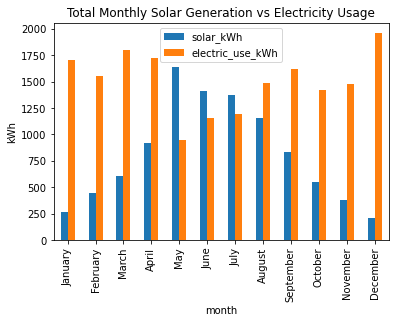

In [42]:
#graph solar generation vs elecricity usage

data_monthly_clean[['solar_kWh','electric_use_kWh']].plot(kind='bar')

plt.title("Total Monthly Solar Generation vs Electricity Usage")
plt.ylabel('kWh')

plt.show()

### Visualize monthly electricty purchased with battery vs wirhout battery

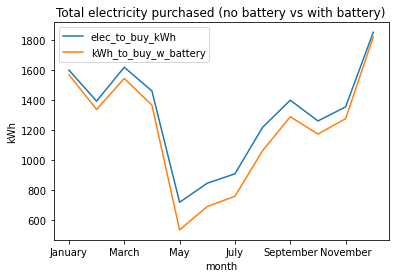

In [43]:
# monthly electricty purchased with battery vs wirhout battery
data_monthly_clean[['elec_to_buy_kWh','kWh_to_buy_w_battery']].plot(kind='line')

plt.title("Total electricity purchased (no battery vs with battery)")
plt.ylabel('kWh')

plt.show()

### Calculate NPV net present value(current expected value of cashflow - current value of invested cash)

#### Positive NPV = positive investment

In [45]:
#Calculate NPV net present value(current expected value of cashflow - current value of invested cash)
# Positive NPV = positive investment

# calculate cashflow for 2022 savings

savings_2022 = data['saved_cost'].sum()

# create list with initial inveatment
savings = [-7000]




#### Scenario 1 : Electricity prices increase as expected 4% p.a

In [46]:
# set electricity growth rate.
electricity_growth_rate = 0.04

#calculate the cost savings cash flow per year, and put it into list
for i in range(0,20): 
    value = savings_2022*(1+electricity_growth_rate)**i
    savings.append(value)
    
savings

[-7000,
 205.57494058800003,
 213.79793821152003,
 222.34985573998085,
 231.24384996958008,
 240.49360396836332,
 250.11334812709782,
 260.1178820521818,
 270.52259733426905,
 281.3435012276398,
 292.5972412767454,
 304.3011309278152,
 316.47317616492785,
 329.132103211525,
 342.297387339986,
 355.98928283358543,
 370.2288541469289,
 385.038008312806,
 400.4395286453183,
 416.4571097911311,
 433.1153941827763]

In [47]:
#set the discount rate
disc_rate = 0.06
npv_values1 = []

#calculate the NPV
for i,c in enumerate(savings):
    disc_value = c/(1+disc_rate)**i
    npv_values1.append(disc_value)

NPV1 = sum(npv_values1)
NPV1

-3743.7191846526052

### Scenario 2: electric prices increase by 0.25% more as predicted by Naomi.


In [49]:
#set the electricity price increate rate
electricity_growth_rate  = 0.04
gr_increase = 0.0025

#reset the list
savings2 = [-7000]

#calculate the cost savings cash flow per year, and put it into list
for i in range(0,20): 
    if i == 0: 
        value = savings_2022*(1+electricity_growth_rate )**i
        savings2.append(value)
    else:
        value = savings_2022*(1+(electricity_growth_rate +((i)*gr_increase)))**i
        savings2.append(value)
    
savings2

[-7000,
 205.57494058800003,
 214.31187556299002,
 224.4929744956107,
 236.28288685273097,
 249.87762512809277,
 265.5098858224355,
 283.4555280802668,
 304.04145748707606,
 327.65522322797614,
 354.75671270000544,
 385.89242289825745,
 421.71290777140104,
 462.994152093415,
 510.66381402983046,
 565.8335218706882,
 629.8387201117366,
 704.2879553613104,
 791.123998407958,
 892.6998478225146,
 1011.8734953979823]

In [50]:
#set the discount rate
disc_rate = 0.06
npv_values2 = []

#calculate the NPV
for i,c in enumerate(savings2):
    disc_value = c/(1+disc_rate)**i
    npv_values2.append(disc_value)

NPV2 = sum(npv_values2)
NPV2

-2605.370782529751

#### Calculate IRR(internal rate of return)is the value of the return rate that makes NPV = 0.

In order for your investment to be considered good, it needs to have a high rate of return (above 20%). If your Internal Rate of Return is low (less than 5%), then it would be wise to reconsider your investment option.

In [52]:
# scenario 1: Electricy price increase by 4%
npf.irr(npv_values1)


-0.06711195426308825

In [ ]:
# scenario 1: Electricy price increase by 4% +0.25%
npf.irr(npv_values2)